## MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II


# Introducción al aprendizaje computacional

## Actividad 1

### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)



En esta actividad vamos a estudiar una primera aproximación a los modelos de aprendizaje computacional, utilizando como base un problema de clasifiación y el modelo de clasificación logístico.


## Actividad en grupos
### Nombres: 

-Angie Paola Chacón

-Jorge Enrique González

-Juan Fernando Ortiz

-Leidy Daniela Rodriguez


**Instrucciones:** Por favor escriba los nombres de los integrantes de su grupo. Esta actividad debe ser entregada a más tardar dentro de 8 días, con la respuesta para los ejercicios y preguntas en cada numeral.

## 1. Aprendizaje computacional

El aprendizaje computacional o **Machine Learning** (ML), utiliza algoritmos con parámetros libres que se puedan ajustar de manera automática, con el objetivo de mejorar el desempeño de los modelos a partir de la información disponible.

El aprendizaje computacional se circunscribe en el campo de la Inteligencia Computacional, o lo que se conoce como Inteligencia Artificial, mediante la búsqueda de patrones a partir de los *Datos*. Entonces, los algoritmos desarrollados dentro del Machine Learning (ML a partir de ahora) se pueden entender como los bloques fundacionales que permiten aprender computacionalmente a partir de los datos. De esta manera, generalizando los datos en lugar de solo almacenarlos y devolver busquedas específicas, como en los sistemas relacionales de bases de datos.


### Tipos de aprendizaje

Los tipos de problemas sobre los que se trabaja en ML se pueden entender como de tipo **supervisado**, **no supervisado**, y **semi-supervisado**. 

**Aprendizaje supervisado**

El aprendizaje supervisado se refiere a modelos, o conjuntos de algoritmos, que aproximan o estiman una función $f(x)$ que representa la relación entre la variable dependiente $Y$ (etiqueta o valor objetivo) y el conjunto de variables independientes $X$. Por ello a los algoritmos de tipo supervisado se les asocia usualmente con modelos predictivos, donde dado un conjunto de datos $X$, se puede predecir un nuevo valor de la variable dependiente $Y$. 

De acuerdo con el tipo de valores en $Y$, se pueden definir dos tipos principales de problemas y algoritmos para analizar los datos:

- Problemas de clasificación

Siempre que la variable $Y$ se refiera a un grupo de categorías (valores sin ningún orden en particular), como por ejemplo bueno/malo, pequeño/grande, la tarea de predecir $Y$ puede ser considerada como un problema de clasificación. En este sentido, las variables de salida se conocen como etiquetas o categorías.

- Problemas de regresión

Un problema de regresión consiste en estimar y/o predecir una variable dependiente (o valor objetivo) $Y$ con valores continuos. Por ejemplo, predecir el precio de una vivienda, de acciones, alimentos, etc. 

**Aprendizaje no-supervisado**
    
El aprendizaje no-supervisado considera problemas donde la variable dependiente $Y$, o las etiquetas para el conjunto de datos, no está disponible. Es decir, cuando $Y$ no está contenida en el conjunto de datos. Entonces, en lugar de estimar o predecir una variable, un algoritmo no-supervisado utiliza técnicas sobre el conjunto de datos de entrada $X$ para detectar patrones, encontrar reglas, o resumir y agrupar los datos. Usualmente, los algoritmos no-supervisados son utilizados para el análisis descriptivo y la modelación, donde se necesita una primera aproximación a los datos, desarrollar una intuición y extraer nuevo conocmiento que es desconocido para el analista y/o experto. 

En el aprendizaje no-supervisado, se tienen dos tareas principales, la reducción de dimensionalidad y el análisis de clustering.

- Reducción de dimensionalidad 

La reducción de dimensionalidad busca encontrar la estructura subyacente de los datos, reduciendo la cantidad de información disponible en el conjunto de datos $X$. Por ejemlo, es muy conocido el análisis de componentes principales. 

- Clustering 

El análisis de clustering consiste en agrupar un conjunto de datos $X$ de manera que cada grupo contenga observaciones más similares entre sí que con las observaciones de otros grupos. Estos grupos son denominados *clusters*. Es una técnica bastante común para la exploración de los datos y su análisis. 


#### Otros tipos de aprendizaje

Más allá de estos dos tipos de aprendizaje presentados anteriormente, existen otros tipos que son bastante útiles dependiendo de la naturaleza del problema. Por ejemplo, el **aprendizaje semi-supervisado** (https://medium.com/inside-machine-learning/placeholder-3557ebb3d470) o el **aprendizaje por refuerzo** (https://medium.com/machine-learning-for-humans/reinforcement-learning-6eacf258b265) 

## 2. Problema de clasificación: riesgo de default

### 2.1 Datos

Como hemos visto, una tarea muy usual dentro del ML es la de la clasificación. Pero antes, vamos a importar las bibliotecas que vamos a usar en este cuaderno.

In [2]:
# Algunos paquetes iniciales que vamos a utilizar
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [3]:
data = pd.read_csv("germancredit.csv")

In [4]:
data.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [5]:
data.dtypes

Default             int64
checkingstatus1    object
duration            int64
history            object
purpose            object
amount              int64
savings            object
employ             object
installment         int64
status             object
others             object
residence           int64
property           object
age                 int64
otherplans         object
housing            object
cards               int64
job                object
liable              int64
tele               object
foreign            object
dtype: object

In [6]:
data.Default.value_counts()

0    700
1    300
Name: Default, dtype: int64

La clase positiva (default=1) tiene menos casos.  Además, es 5 veces más costoso clasificar a un usuario como bueno (Defualt=0) cuando es malo (Default=1), que clasificarlo como malo cuando es bueno.

In [7]:
data.foreign.value_counts()

A201    963
A202     37
Name: foreign, dtype: int64

Vemos que la mayoría de clientes de la base de datos son extranjeros.

## 2.2 Codificacion de variables categoricas

In [8]:
credit_1 = data.copy()
credit_1 = pd.get_dummies(credit_1, columns=['checkingstatus1','history','purpose','savings',
                                   'employ','status','others','property','otherplans','housing','job','tele', 
                                   'foreign'], prefix = ['checkingstatus1','history','purpose','savings',
                                   'employ','status','others','property','otherplans','housing','job','tele', 
                                   'foreign'])

print(credit_1.head())

   Default  duration  amount  installment  residence  age  cards  liable  \
0        0         6    1169            4          4   67      2       1   
1        1        48    5951            2          2   22      1       1   
2        0        12    2096            2          3   49      1       2   
3        0        42    7882            2          4   45      1       2   
4        1        24    4870            3          4   53      2       2   

   checkingstatus1_A11  checkingstatus1_A12  ...  housing_A152  housing_A153  \
0                    1                    0  ...             1             0   
1                    0                    1  ...             1             0   
2                    0                    0  ...             1             0   
3                    1                    0  ...             0             1   
4                    1                    0  ...             0             1   

   job_A171  job_A172  job_A173  job_A174  tele_A191  tele_A19

In [9]:
X = credit_1.iloc[:, 1:62]#[['duration','amount','installment','residence','age','cards','liable']]
Y = credit_1.iloc[:, 0]
X.shape

(1000, 61)

### 3. Regresión logística

Podemos estudiar un problema de clasificación desde una perspectiva probabilística, examinando una situación donde la variable respuesta ($Y_i$) consiste de dos categorías ($\{0,1\}$). La *regresión logística* estima la probabilidad de que una observación pertenezca a una de las dos categorías.

Entonces se modela la función de probabilidad $p(Y_i=1)$ de tal manera que tome un valor entre 0 y 1. La función de regresión logística consiste en la función *sigmoide* ($\sigma(\cdot)$) $$ p(Y_i)=p(Y_i=1)=\frac{e^{\beta_0 + \beta_1X_{1} + ... + \beta_k X_{k}}}{1+e^{\beta_0 + \beta_1X_{1} + ... + \beta_k X_{k}}}=\frac{e^{Z_i}}{1+e^{Z_i}}=\sigma(Z_i)$$
donde se tiene que 
$$log\frac{p(Y_i)}{1-p(Y_i)}=\beta_0 + \beta_1X_{1} + ... + \beta_k X_{k}.  $$


Por lo tanto, manteniendo todo lo demás constante, se puede estimar el cambio que una unidad extra en $X_1$ tiene sobre  el chance (o el *log-odds*) $log\frac{p(Y_i)}{1-p(Y_i)}$. Esta estimación está dada por $\hat \beta_1$. 


Los coeficientes del modelo se pueden estimar por el método de máxima verosimilitud, buscando iterativamente estimadores que maximicen la función de verosimilitud: $$ F_{\mathbf{\beta}}=\prod_{i:Y_i=1} p(Y_i)\prod_{i':Y_{i'}=0}(1-p(Y_{i'})). $$


Finalmente, la extensión del modelo logístico para múltiples clases o categorías ($C$) se hace calculando la probabilidad de una categoría ($C_i$) frente al resto y utilizando lo que se conoce como una función *softmax*: 
$$ \sigma (Z_i )={\frac {e^{Z_{i}}}{\sum _{j=1}^{|C|}e^{Z_{j}}}}{\text{ para }}i=1,\dotsc ,|C|$$


Miremos un ejemplo con nuestros datos sobre el comportamiento de los clientes del banco. Primero descargamos los paquetes que vamos a utilizar:

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

Por defecto, la funcion `LogisticRegression()` encuentra una solución mediante el algoritmo de Broyden–Fletcher–Goldfarb–Shanno (BFGS):  https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm

In [11]:
log = LogisticRegression(solver = "newton-cg", penalty='none', max_iter=100) 
log.fit(X, Y)
y_pred_log = log.predict(X)
log_coef = log.coef_
print(log_coef)

[[ 2.78633214e-02  1.28274756e-04  3.30089792e-01  4.77611860e-03
  -1.45354966e-02  2.72075927e-01  2.64671370e-01  5.53093556e-01
   1.78240399e-01 -4.12583168e-01 -1.15879451e+00  3.78324470e-01
   5.21702685e-01 -2.07788419e-01 -4.74836085e-01 -1.05744637e+00
   7.50081685e-01 -9.16385984e-01 -7.38708918e-01 -4.15286554e-02
  -1.41501732e-01  2.27302563e-01  5.33685913e-01  7.86365798e-01
  -1.30934912e+00  9.99473131e-03  4.35931648e-01  7.81913316e-02
   5.98588394e-02 -9.03267472e-01 -5.10758067e-01  1.03464812e-01
   3.65546018e-02 -7.93663346e-02 -7.27537083e-01 -1.73159715e-01
   1.54640454e-01 -1.20814667e-01 -6.61437590e-01 -2.12431916e-01
  -9.91583578e-02  3.36888658e-01 -1.07777402e+00 -5.11616127e-01
  -2.30178022e-01 -3.17081423e-01  2.18831853e-01 -2.35048471e-02
  -1.46705277e-01 -6.69833595e-01  9.58123345e-02 -3.47808431e-01
  -5.88047622e-01 -6.02591479e-01 -6.64615400e-02 -4.78742723e-02
  -1.23116427e-01 -2.70017879e-01 -5.70025840e-01  2.76085862e-01
  -1.11612

In [12]:
log.n_iter_

array([62])

### Ejercicio 3.1

Ajuste las opciones de la funcion `LogisticRegression`para conseguir que la solucion converja. Puede examinar la documentación de Python: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [13]:
log = LogisticRegression(solver = "newton-cg", penalty='none', max_iter=100) 
log.fit(X, Y)
y_pred_log = log.predict(X)
log_coef = log.coef_
print(log_coef)

[[ 2.78633214e-02  1.28274756e-04  3.30089792e-01  4.77611860e-03
  -1.45354966e-02  2.72075927e-01  2.64671370e-01  5.53093556e-01
   1.78240399e-01 -4.12583168e-01 -1.15879451e+00  3.78324470e-01
   5.21702685e-01 -2.07788419e-01 -4.74836085e-01 -1.05744637e+00
   7.50081685e-01 -9.16385984e-01 -7.38708918e-01 -4.15286554e-02
  -1.41501732e-01  2.27302563e-01  5.33685913e-01  7.86365798e-01
  -1.30934912e+00  9.99473131e-03  4.35931648e-01  7.81913316e-02
   5.98588394e-02 -9.03267472e-01 -5.10758067e-01  1.03464812e-01
   3.65546018e-02 -7.93663346e-02 -7.27537083e-01 -1.73159715e-01
   1.54640454e-01 -1.20814667e-01 -6.61437590e-01 -2.12431916e-01
  -9.91583578e-02  3.36888658e-01 -1.07777402e+00 -5.11616127e-01
  -2.30178022e-01 -3.17081423e-01  2.18831853e-01 -2.35048471e-02
  -1.46705277e-01 -6.69833595e-01  9.58123345e-02 -3.47808431e-01
  -5.88047622e-01 -6.02591479e-01 -6.64615400e-02 -4.78742723e-02
  -1.23116427e-01 -2.70017879e-01 -5.70025840e-01  2.76085862e-01
  -1.11612

## Pregunta 3.2 

Cuántas iteraciones necesitó?

### Se necesitaron 61 iteraciones

## 4. Construccion de modelos predictivos

Partimos los datos de manera aleatoria en un conjunto de entrenamiento y otro de prueba. De esta manera, estimamos los coeficientes sobre los datos de entrenamiento, y ese mismo modelo lo probamos sobre los datos de prueba con el fin de controlar que el modelo esté generalizando bien y no se sobreajuste a los datos.

A continuación ejecutamos el codigo para obtener una partición con el 40% de los datos en el conjunto de prueba. Nótese que por defecto la funcion `train_test_split` sigue una partición estratificada, es decir, mantiene la distribución inicial de las clases en ambos conjuntos de entrenamiento y prueba:


In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=42)
print("Tamaño de CE, CP: ", y_train.shape, y_test.shape)
print("Observaciones de la clase positiva en entrenamiento: " +str(sum(y_train)) +" y en prueba: " +str(sum(y_test)))

Tamaño de CE, CP:  (600,) (400,)
Observaciones de la clase positiva en entrenamiento: 182 y en prueba: 118


Lo podemos verificar:

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)
print("Tamaño de CE, CP: ", y_train.shape, y_test.shape)
print("Observaciones de la clase positiva en entrenamiento: " +str(sum(y_train)) +" y en prueba: " +str(sum(y_test)))

Tamaño de CE, CP:  (600,) (400,)
Observaciones de la clase positiva en entrenamiento: 180 y en prueba: 120


A continuación ajustamos el modelo logístico y lo probamos:

In [16]:
logT = LogisticRegression(penalty='none', max_iter=1500)
logT.fit(X_train, y_train)
y_tr = logT.predict(X_train)
y_pred = logT.predict(X_test)

Con menos datos para entrenar probablemente el algoritmo necesite más iteraciones:

In [17]:
logT.n_iter_

array([749])

Examinemos los coeficientes del modelo y su desviación con respecto a la estimación anterior (que utilizaba todos los datos de la muestra).

In [18]:
logT_coef = logT.coef_
print(logT_coef)

[[ 2.52686652e-02  1.02117165e-04  3.48238974e-01  2.55262100e-02
  -9.18675274e-03  1.98510037e-01  3.31242815e-01  5.08645527e-01
   1.70840957e-01 -3.81353187e-01 -1.08364275e+00  3.24147953e-01
   3.82934375e-01 -1.65706225e-01 -1.74147875e-01 -1.15273769e+00
   1.73371035e-01 -9.70392361e-01 -5.32480916e-01 -2.62442743e-01
  -2.93405390e-01 -9.55614662e-02  1.56124717e-01  1.05501583e+00
  -1.61675762e-03 -1.41214041e-02  7.20259235e-01  2.52254964e-01
  -2.81078704e-01 -1.12978346e+00 -3.47161490e-01  7.19697209e-01
   3.65770120e-02 -2.36368886e-01 -1.14934528e+00 -1.56069512e-01
   2.80181724e-01 -2.03988297e-01 -6.22485242e-01 -2.39217642e-01
  -2.24723368e-01  2.89080095e-01 -8.49866184e-01 -5.19869712e-01
  -1.89204161e-01 -2.56732374e-01  1.80296790e-01  5.25383654e-02
  -2.31091458e-02 -8.14938677e-01  4.99417404e-01 -4.22439082e-01
  -8.62487778e-01 -1.37570495e-01 -1.26214792e-01 -1.55628938e-01
  -3.66095231e-01 -2.10119295e-01 -5.75390162e-01  4.37517535e-01
  -1.22302

In [19]:
print(log_coef-logT_coef)

[[ 2.59465621e-03  2.61575909e-05 -1.81491826e-02 -2.07500914e-02
  -5.34874385e-03  7.35658906e-02 -6.65714451e-02  4.44480295e-02
   7.39944139e-03 -3.12299814e-02 -7.51517525e-02  5.41765165e-02
   1.38768311e-01 -4.20821939e-02 -3.00688210e-01  9.52913148e-02
   5.76710651e-01  5.40063771e-02 -2.06228002e-01  2.20914087e-01
   1.51903658e-01  3.22864029e-01  3.77561196e-01 -2.68650030e-01
  -1.30773236e+00  2.41161354e-02 -2.84327587e-01 -1.74063633e-01
   3.40937543e-01  2.26515991e-01 -1.63596576e-01 -6.16232397e-01
  -2.24101610e-05  1.57002552e-01  4.21808196e-01 -1.70902032e-02
  -1.25541270e-01  8.31736293e-02 -3.89523472e-02  2.67857260e-02
   1.25565010e-01  4.78085623e-02 -2.27907834e-01  8.25358442e-03
  -4.09738605e-02 -6.03490492e-02  3.85350632e-02 -7.60432125e-02
  -1.23596131e-01  1.45105082e-01 -4.03605069e-01  7.46306510e-02
   2.74440156e-01 -4.65020984e-01  5.97532524e-02  1.07754666e-01
   2.42978804e-01 -5.98985842e-02  5.36432206e-03 -1.61431673e-01
   1.06897

### Ejercicio 4.1

Implemente un proceso de validación cruzada cambiando la semilla de las particiones de train (CE) y test (CP). Estimae la varianza de los estimadores y concluya si su *mejor* modelo es estable entre distintas particiones.

In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=84)
print("Tamaño de CE, CP: ", y_train.shape, y_test.shape)
print("Observaciones de la clase positiva en entrenamiento: " +str(sum(y_train)) +" y en prueba: " +str(sum(y_test)))

Tamaño de CE, CP:  (600,) (400,)
Observaciones de la clase positiva en entrenamiento: 192 y en prueba: 108


In [54]:
log_grupo = LogisticRegression(solver = 'lbfgs',penalty='none', max_iter=1500)
log_grupo.fit(X_train, y_train)
y_tr = log_grupo.predict(X_train)
y_pred = log_grupo.predict(X_test)

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_grupo, X_train, y_train, cv=5)

C:\Users\GONGAR\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
scores

array([0.72, 0.76, 0.72, 0.68, 0.78])

In [57]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.07)


#### Al tener una desviación estandar de +/- 0.06 entre los puntajes del modelo, se concluye que el intervalo de confianza de los puntajes (scores) se encuentra entre 0.68 y 0.8. Al encontrarse los puntajes (scores) entre 0 y 1, se concluye que la varianza es del 6%, por lo que es estable entre las distintas particiones

## 5. Evaluacion de los modelos
Hasta ahora hemos estimado los parámetros del modelo logístico. Pero no hemos examinado si la solución es satisfactoria. A continuación examinemos el desempeño de los modelos a partir de su matriz de confusión: 

In [39]:
from sklearn.metrics import confusion_matrix

# Calculamos la matriz de confusión para la prediccion
cm_log = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(cm_log)

[[230  62]
 [ 41  67]]


Podemos mejorar esta visualización, añadiendo etiquetas para lo que es predicción y lo que es observado en la muestra:

In [40]:
def plot_confusion_matrix(cm, title='Matriz de confusión', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta estimada')

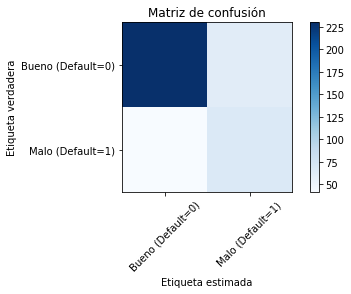

In [41]:
labels=['Bueno (Default=0)' ,'Malo (Default=1)']

plt.figure()
plot_confusion_matrix(cm_log)

Podemos resumir estos resultados, por ejemplo mediante la métrica de *exactitud* o *accuracy*, la cual mide la proporción de aciertos sobre el total de casos.

Para entrenamiento:

In [42]:
float((y_tr == y_train).mean())

0.7966666666666666

Para predicción:

In [43]:
float((y_pred == y_test).mean())

0.7425

### Ejercicio 5.1

Calcule una métrica de desempeño que tome en cuenta el coste de errar, donde el coste de predecir que un mal cliente es bueno es 5 veces más alto que el de confundir un buen cliente con uno malo.

El accuracy o exactitud no es la métrica más adecuada en este caso, para tener en cuenta el "coste de errar" podemos tener en cuenta otras métricas como la sensibilidad (proporción de casos positivos identificados correctamente) y la especificidad (casos negativos clasificados correctamente).

In [44]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix sin penalización: \n', cm_log)

total1=sum(sum(cm_log))
#####from confusion matrix calculate accuracy
accuracy1=(cm_log[0,0]+cm_log[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm_log[0,0]/(cm_log[0,0]+cm_log[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm_log[1,1]/(cm_log[1,0]+cm_log[1,1])
print('Specificity : ', specificity1)

Confusion Matrix sin penalización: 
 [[230  62]
 [ 41  67]]
Accuracy :  0.7425
Sensitivity :  0.7876712328767124
Specificity :  0.6203703703703703


La penalización se realiza dándole un mayor peso a la clase 1, es decir, que sea un mal cliente. podemos ver con los nuevos parámetros que aunque la exactitud del modelo disminuye (de 74% a 59%), la especificidad aumenta, ya que pasa del 62% al 90%, es decir, clasifica mejor cuando un cliente es malo.

In [45]:
log_grupo = LogisticRegression(solver = 'lbfgs',penalty='none', max_iter=1500,class_weight = {0:1, 1:5})
log_grupo.fit(X_train, y_train)
y_tr2 = log_grupo.predict(X_train)
y_pred2 = log_grupo.predict(X_test)

cm_log2 = confusion_matrix(y_test, y_pred2)
np.set_printoptions(precision=2)

print('Confusion Matrix con penalización: \n', cm_log)

total2=sum(sum(cm_log2))

accuracy2=(cm_log2[0,0]+cm_log2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm_log2[0,0]/(cm_log2[0,0]+cm_log2[0,1])
print('Sensitivity : ', sensitivity2)

specificity2 = cm_log2[1,1]/(cm_log2[1,0]+cm_log2[1,1])
print('Specificity : ', specificity2)

Confusion Matrix con penalización: 
 [[230  62]
 [ 41  67]]
Accuracy :  0.5975
Sensitivity :  0.4863013698630137
Specificity :  0.8981481481481481


### Justicia algorítmica

Veamos cómo se comporta el modelo de acuerdo con el origen (extranjero o local) del cliente. Por ejemplo, fijémonos en el balance inicial de los datos de la muestra:

In [46]:
credit_2 = credit_1.copy()
credit_3 = credit_2.loc[credit_2['foreign_A201'] == 1]
X3 = credit_3.iloc[:, 1:62]
Y3 = credit_3.iloc[:, 0]

credit_4 = credit_2.loc[credit_2['foreign_A201'] == 0]
X4 = credit_4.iloc[:, 1:62]
Y4 = credit_4.iloc[:, 0]

In [47]:
print("El numero de clientes extranjeros de la muestra: " +str(X3.shape[0]) +" y los locales: " +str(X4.shape[0]))

El numero de clientes extranjeros de la muestra: 963 y los locales: 37


## Pregunta 5.2

De los clientes locales cuantos han tenido Default?

In [48]:
data.foreign.value_counts()

A201    963
A202     37
Name: foreign, dtype: int64

In [49]:
data.groupby(['foreign']).Default.value_counts()

foreign  Default
A201     0          667
         1          296
A202     0           33
         1            4
Name: Default, dtype: int64

#### Es posible observar que el 10,8% de los locales tienen riesgo de default, mientras que el 30,7% de los extranjeros  lo tienen. Por lo tanto, es posible que la variable _foreign_ cause un sesgo al momento de clasificar a los clientes

Vemos que ya hay un sesgo en los datos de entrenamiento. Por lo tanto, podemos esperar que esto se vea reflejado en nuestro modelo:

In [50]:
y_pred_f = logT.predict(X3)
y_pred_l = logT.predict(X4)

Veamos otra manera de visualizar la matriz de confusion:

Extranjeros:


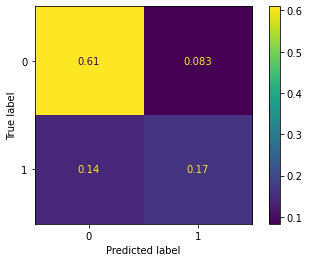

Locales:


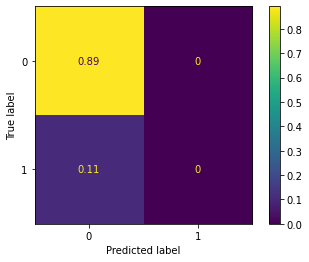

In [68]:
from sklearn.metrics import plot_confusion_matrix

print("Extranjeros:")
plot_confusion_matrix(logT, X3, Y3, normalize='all')  
plt.show() 

print("Locales:")
plot_confusion_matrix(logT, X4, Y4, normalize='all')  
plt.show()

Y las métricas de exactitud:

In [51]:
print("La exactitud para el usuario extranjero:", float((y_pred_f == Y3).mean()))
print("La exactitud para el usuario local:", float((y_pred_l == Y4).mean()))

La exactitud para el usuario extranjero: 0.770508826583593
La exactitud para el usuario local: 0.918918918918919


### Ejercicio 5.3

Proponga una modelo de clasificación que detecte clientes con un alto riesgo de Default, teniendo en cuenta el costo de clasificar a un cliente erroneamente  junto con la "equidad algoritmica".

### Lecturas avanzadas

Para ler más sobre la ética algoritmica puede ver: Pessach, D., Shmueli, E. (2020) Algorithmic fairness. https://arxiv.org/abs/2001.09784 